## Imports

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## Read data

In [2]:
print(os.getcwd())
dfvith = pd.read_csv('../ExperimentData/AmgEvaluationData/Sam1_VitH_best_config_results.csv')
dfsmall21 = pd.read_csv('../ExperimentData/AmgEvaluationData/Sam2_hieraS2.1_best_config_results.csv')

df = pd.concat([dfvith, dfsmall21], ignore_index=True)

rename_dict = {'sam_vit_h_4b8939.pth': ' SAM 1 vit h',
                'sam2.1_hiera_small.pt': 'SAM 2.1 small',}

df['model'] = df['model'].replace(rename_dict)

print(df.columns)


                                        

c:\Users\geink81\Desktop\pythonstuff\SequenceSAM-Annotator\DataVisualization
Index(['recall', 'precision', 'predictions', 'ground_truth', 'TP', 'FP', 'FN',
       'mean_iou_of_tp', 'std_iou_of_tp', 'Dataset', 'img_dir', 'model',
       'points_per_side', 'points_per_batch', 'pred_iou_thresh',
       'stability_score_thresh', 'stability_score_offset', 'box_nms_thresh',
       'crop_n_layers', 'crop_nms_thresh', 'crop_n_points_downscale_factor',
       'f_beta', 'error'],
      dtype='object')


## PLotting

In [3]:
def _draw_text(ax, x, y, text):
    if not pd.isna(text):
        ax.text(x, y, text, horizontalalignment='center', size='medium', color='black', weight='semibold')

def get_box_plot(df, xkey, ykey, colour_key):
    custom_cmap = sns.color_palette(['#aa4499','#44aa99']) 
   
    sign_letters = ['a', 'b']
    plt.rcParams["font.family"] = "Times New Roman"
    plt.figure(dpi=300, figsize=(3*0.8, 5*0.8))
    ax = sns.boxplot(data=df, x=xkey, y=ykey, hue=colour_key, color='#2fb2b2', palette=custom_cmap, flierprops={"marker": ".", "markerfacecolor": "white", "markersize": 4})
    ax.set_ylim(0, 1.15)
    ax.set_ylabel("$\mathit{F}$($\\beta$ = 2) per image")
    ax.set_xlabel('')
    for tick, label in zip(ax.get_xticks(), ax.get_xticklabels()):
            _draw_text(ax, tick , 1.05, sign_letters[tick])
         

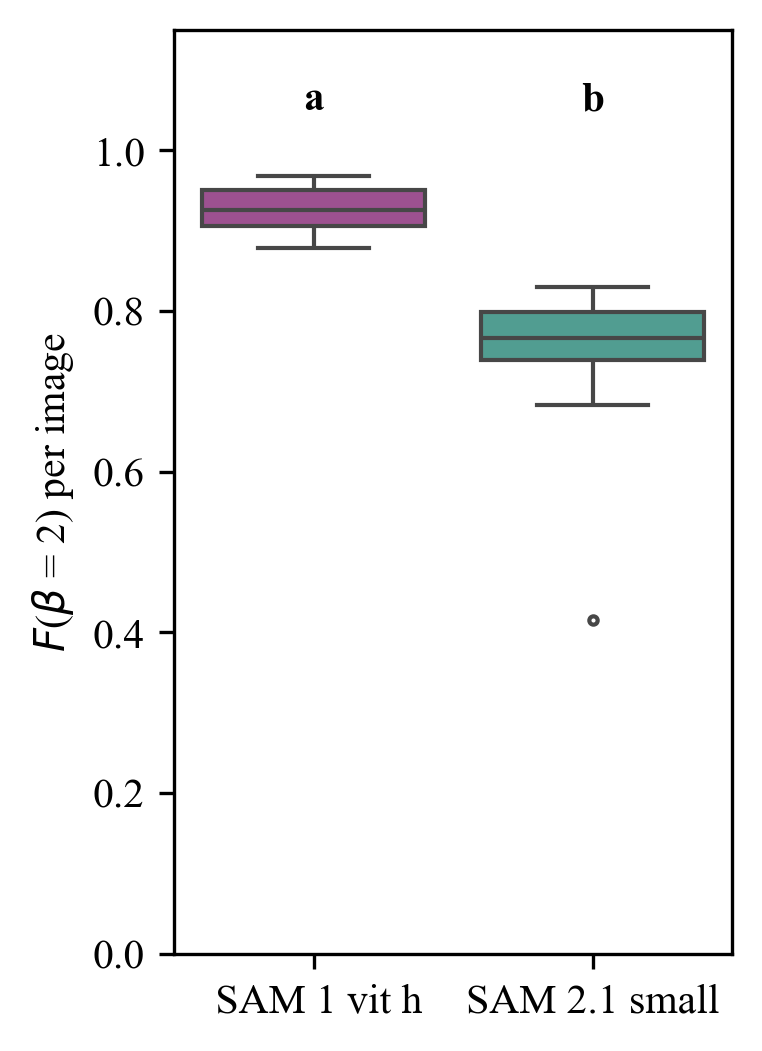

In [4]:
get_box_plot(df, 'model', 'f_beta', 'model')